# IS4487 Module 3 - Practice Code

This notebook is designed to help you follow along with the **Module 3 Lecture and Reading**, introducing you to visualization in Python.

The practice code demos are intended to give you a chance to see working code and can be a source for your lab and assignment work.  Each section contains short explanations and annotated code to help you learn.

### Topics for this demo:
- Create charts from full dataframe
- Aggregate data for a chart

<a href="https://colab.research.google.com/github/vandanara/UofUtah_IS4487/blob/main/Demos/demo_03_visualization_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### Context: Motor Trend Car Road Tests
This example uses a small set of data from the 1970s with road tests from cars.  This is the classic dataset that statisticians have been using for the last 50 years to learn to work with data.  

| Column | Description                              |
| ------ | ---------------------------------------- |
| mpg    | Miles per gallon (fuel efficiency)       |
| cyl    | Number of cylinders                      |
| disp   | Displacement (cu. in.)                   |
| hp     | Gross horsepower                         |
| drat   | Rear axle ratio                          |
| wt     | Weight (1000 lbs)                        |
| qsec   | ¼ mile time                              |
| vs     | Engine type (0 = V-shaped, 1 = straight) |
| am     | Transmission (0 = automatic, 1 = manual) |
| gear   | Number of forward gears                  |
| carb   | Number of carburetors                    |


Your task is to visualize the data using Python functions.

### Import libraries

We will import two libraries
- Pandas, which is like Excel for Python.  It creates 2-dimensional data frames and lets you work with the rows and columns.  
- StatsModels has sample data for use in experimenting with Python

In [28]:
import pandas as pd
import statsmodels.api as sm

Let us increase the width of each column and the overall Colab output display - without this, if you display the data, it will wrap the output since all columns do not fit in the default output width.

In [29]:
#Set the maximum column width to a specific value (e.g., 100 characters)
pd.set_option('display.max_colwidth', 100)

#Set the overall display width
pd.set_option('display.width', 180) # Adjust this value as needed

### Import Sample Data

Import the data that was used in lab 1

In [30]:
# obtain the data
mtcars = sm.datasets.get_rdataset("mtcars", "datasets", cache=True).data

# convert to a Pandas Dataframe
df = pd.DataFrame(mtcars)

# this Dataframe uses car names as its row index, i.e. the index of each row is a different car
# it will be useful to also save the car names into a new column in the Dataframe.
# create a new column called 'carmodel' and save the values from the Dataframe's index into it
df['carmodel'] = df.index

# notice that the df now has a new column added at the end.
print(df)

                      mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  carb             carmodel
rownames                                                                                               
Mazda RX4            21.0    6  160.0  110  3.90  2.620  16.46   0   1     4     4            Mazda RX4
Mazda RX4 Wag        21.0    6  160.0  110  3.90  2.875  17.02   0   1     4     4        Mazda RX4 Wag
Datsun 710           22.8    4  108.0   93  3.85  2.320  18.61   1   1     4     1           Datsun 710
Hornet 4 Drive       21.4    6  258.0  110  3.08  3.215  19.44   1   0     3     1       Hornet 4 Drive
Hornet Sportabout    18.7    8  360.0  175  3.15  3.440  17.02   0   0     3     2    Hornet Sportabout
Valiant              18.1    6  225.0  105  2.76  3.460  20.22   1   0     3     1              Valiant
Duster 360           14.3    8  360.0  245  3.21  3.570  15.84   0   0     3     4           Duster 360
Merc 240D            24.4    4  146.7   62  3.69  3.190  20.00  

### Create a Chart

We will create a line chart using Pandas. \n
To do so, we will use the Dataframe's plot() method.
It has many parameters to specify many options to describe what to plot and also customize the chart. The options we will use are x-axis, y-axis, kind of plot, and the title of the plot

<Axes: title={'center': 'MPG by Car'}, xlabel='carmodel'>

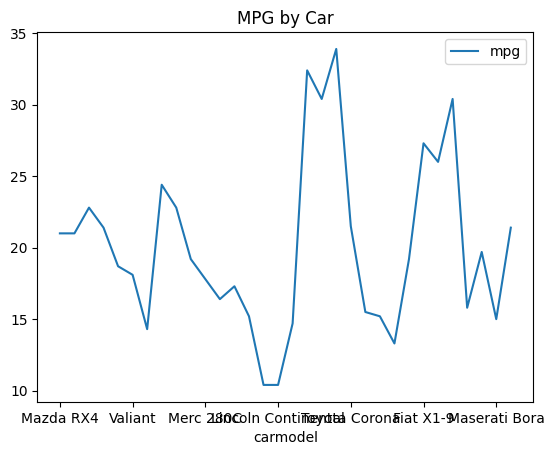

In [31]:
#Line chart
df.plot(x='carmodel', y='mpg', kind='line', title="MPG by Car")



If you dont specify an x-axis, it will use the index by default. Also let's see if we can do better and fix the x-axis labels.

To do this, we need to import Python's plotting library - matplotlib - this has a lot more custiomizable options.

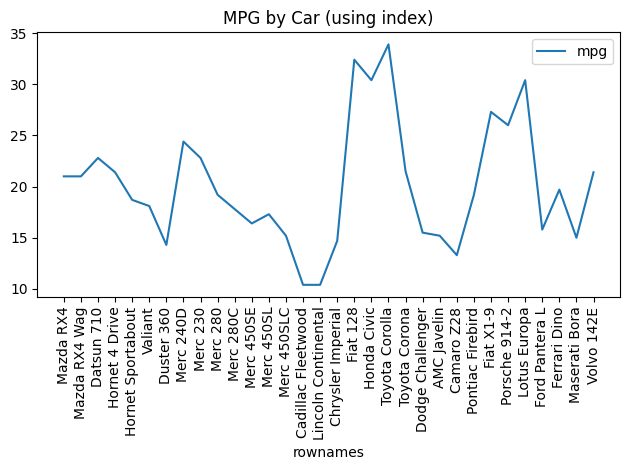

In [39]:
import matplotlib.pyplot as plt

df.plot(y='mpg', kind='line', title="MPG by Car (using index)")   # index used for x-axis by default

plt.xticks(ticks=range(len(df.index)), labels=df.index, rotation=90)   # show all car names as xticks, rotate 90 degrees
plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.show()   # show the plot

We will see more in lab_03